In [1]:
from classes import SnapEvolution, SnapViewer
from sphviewer.tools import cmaps as cmp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import collections
import math

# create the array with all the snaps of the event

· first the path where the snap is found is generated, then the SnapEvolution class is used to be able to read the snap

In [2]:
path = '/home/esillero/sphviewer-sims/snaps/iso-H2/snap_'
q = 300
data = SnapEvolution(path, q)

Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_b

Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
Non-info; n_block=19
202 files added


# age distribution in different snap

· different snap are used to observe the change of ages in it, in addition an extent of such magnitude is occupied because the accounts are not captured on such a large scale, thus producing a capture error.

· the snap of each different snap chosen in the range variable is taken, later the center of the position of such snap is obtained, then the lifetime is calculated (snap.header ['time'] -> current time, snap.part[4]['StellarFormationTime'] -> time from when it was created) which is finally multiplied by (9.8e8) / (1e9) to obtain in the time variable the time in giga years.

· then the mass of such snap is obtained and a quickview is generated both for the life time multiplied by its respective mass and for the mass and thus obtain the mass density.

· Finally, the images of these qickview are obtained and the division of the life time with the mass density is added to a list, in order to obtain the life time with the corresponding weight.

· everything else corresponds to showing the snap and finding its maximum and minimum points, and eliminate some other error in the data.

/home/feliperojas/jupy/lib64/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


0.0073080882
0.32597107


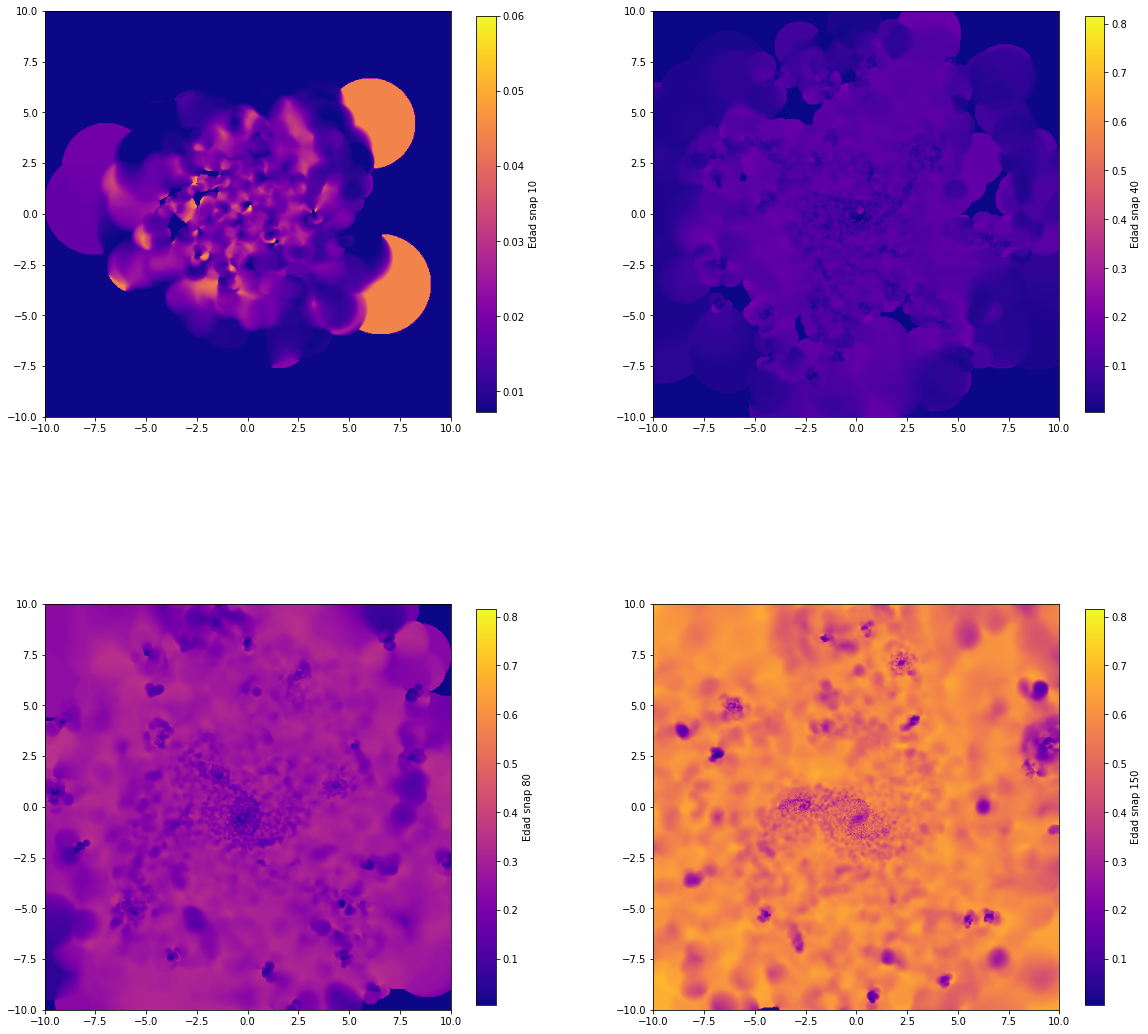

In [9]:
#img, extent, vmin, vmax, cmap, label, l_color='white' ,hori=True, save=False, path=''
rango = [10, 40, 80, 150]
extent = [-10, 10, -10, 10]
imagenes = []
for i in rango:
    minimo = 10e10
    snap = data.snaps[i]
    x,y,z = snap.centroid(snap.pos)
    time = (snap.header['time'] - snap.part[4]['StellarFormationTime'])*(9.8e8)/(1e9) 
    masa = snap.mass[4]
    age_qv = snap.quickview(pos= snap.pos[4],mass= time*masa[:,0], r='infinity', extent=extent,
                        plot=False, x=x, y=y, z=z, logscale=False, nb=15) 
    density = snap.quickview(pos= snap.pos[4],mass= masa[:,0], r='infinity', extent=extent,
                        plot=False, x=x, y=y, z=z, logscale=False, nb=15) 
    img = age_qv.get_image()
    mass = density.get_image()
    
    img_real = img/mass
    for i in img_real:
        for j in i:
            if j < minimo and not np.isnan(j) and j != -math.inf:
                minimo = j
    
    for i in range(len(img_real)):
        for j in range(len(img_real[i])):
            if np.isnan(img_real[i][j]) or img_real[i][j] == -math.inf:
                img_real[i][j] = minimo
    imagenes.append(img_real)
fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(nrows=2, ncols=2)
labels = ['Edad snap 10', 'Edad snap 40', 'Edad snap 80', 'Edad snap 150']

axs = []
for i in range(2):
    for j in range(2):
        ax = fig.add_subplot(gs[i,j])
        axs.append(ax)

vmin,vmax = data.vmean(imagenes, 4) 

print(vmin)
print(vmax)

for i in range(len(imagenes)):
    if i == 0:
        show = axs[i].imshow(imagenes[i], extent=extent, cmap='plasma', vmin=vmin, vmax=0.06)
    else:
        show = axs[i].imshow(imagenes[i], extent=extent, cmap='plasma', vmin=vmin, vmax=vmax*2.5)
    cbar = fig.colorbar(show, shrink=0.8, ax=axs[i], spacing='proportional')
    cbar.set_label(f'{labels[i]}')
plt.show()

# abundance of oxygen and others elements metallicity.

·First, the mass of the different elements chosen is calculated, its center of position for the gas elements is calculated, and an extent of such magnitude is chosen after doing different tests on it.

· then for the mass of each particle its quickview is generated.

· Finally, the abundance is calculated with the formula used and added to a list.

· Then everything else is to find the minimums and maximums, and to show the image of the abundances.

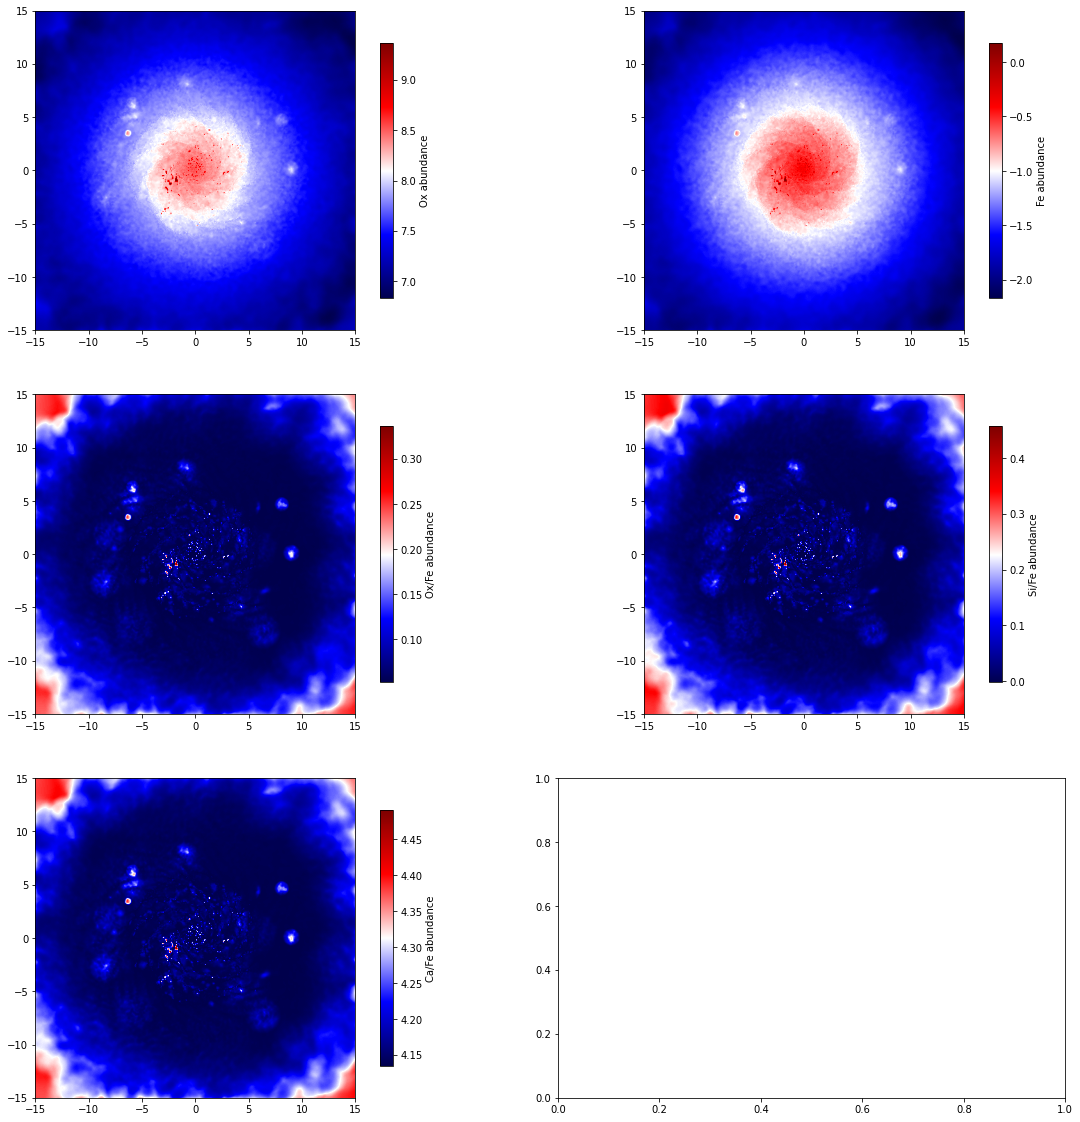

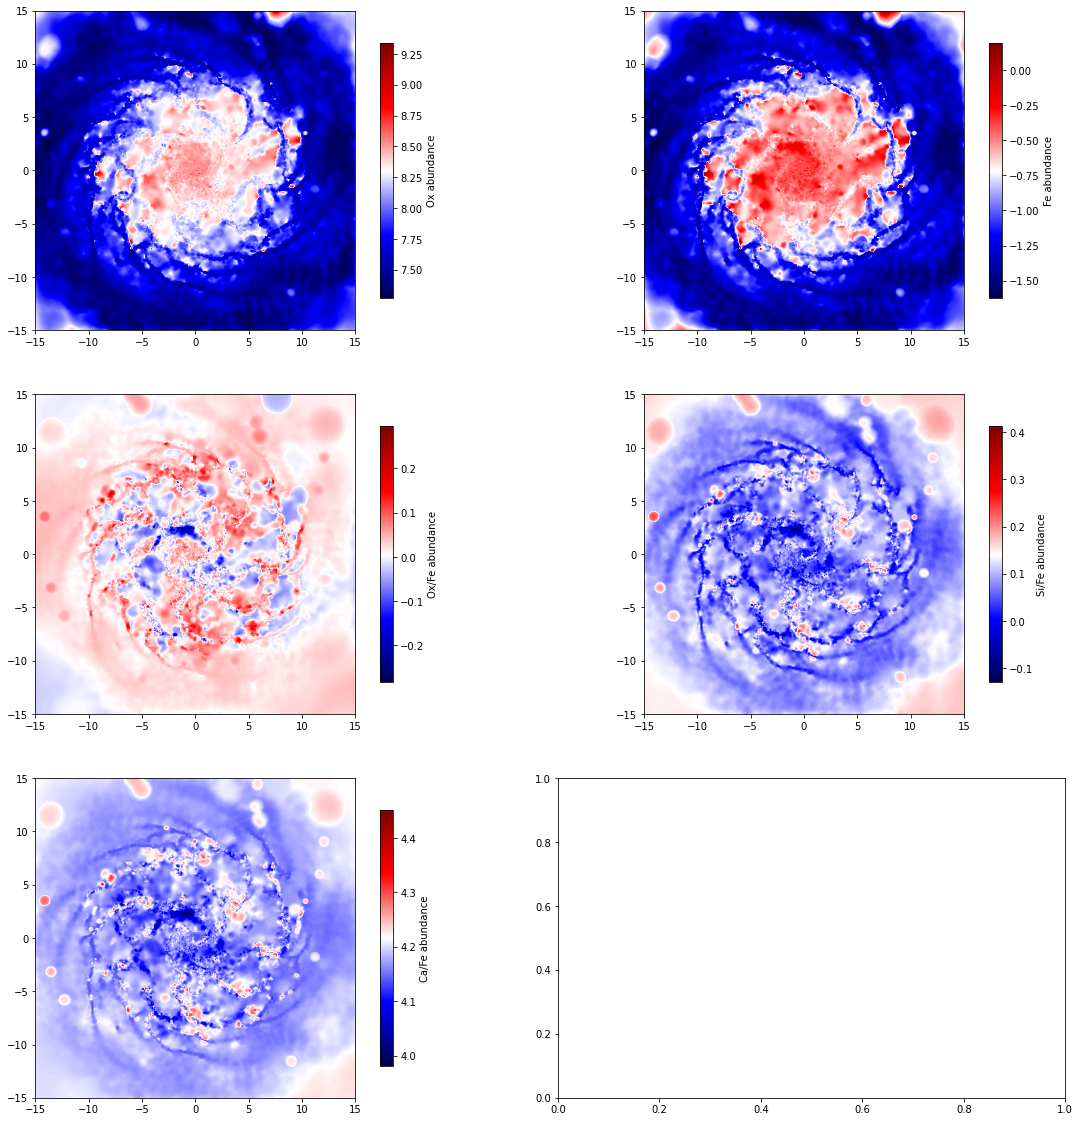

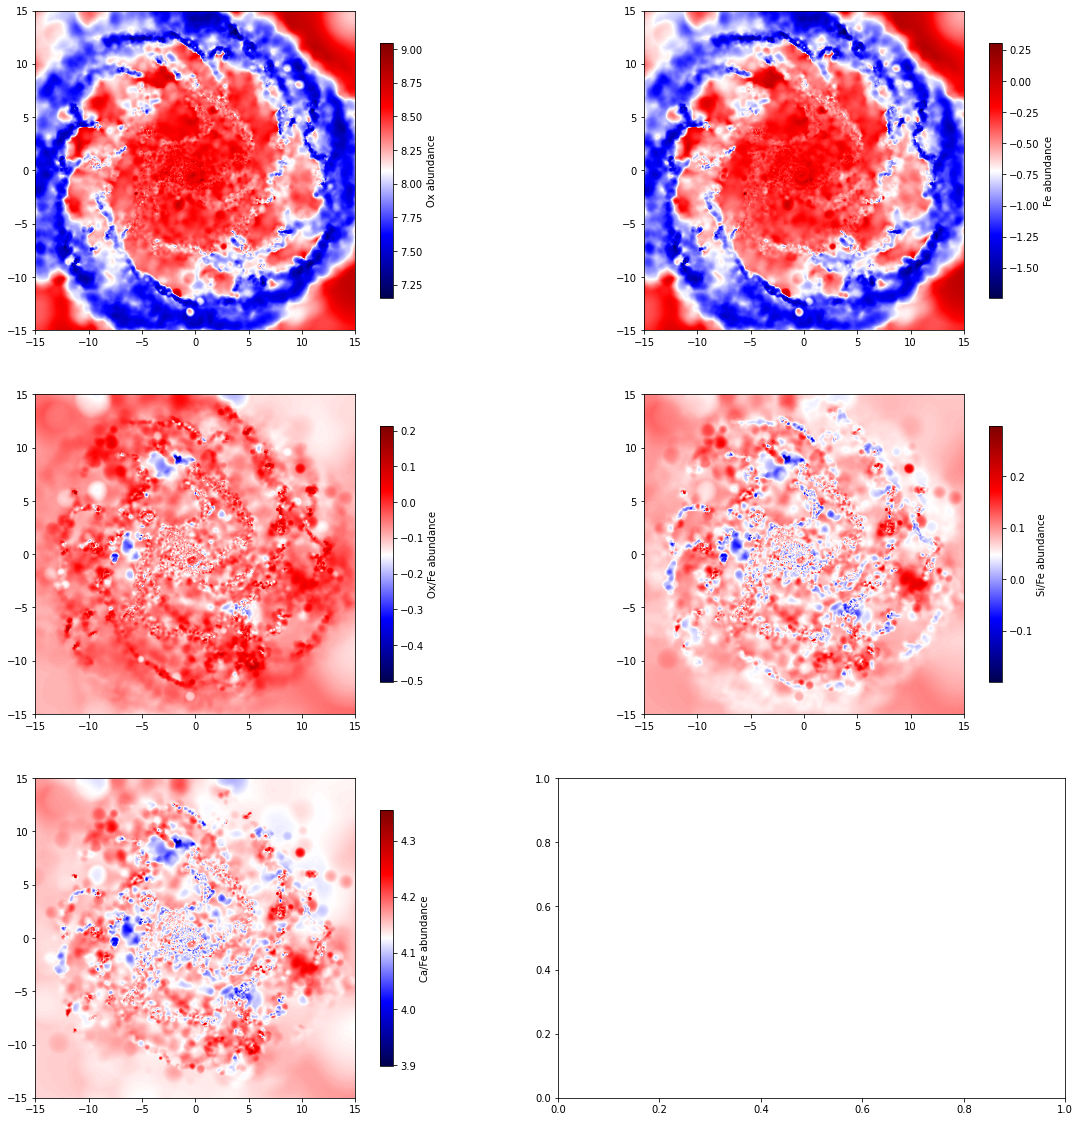

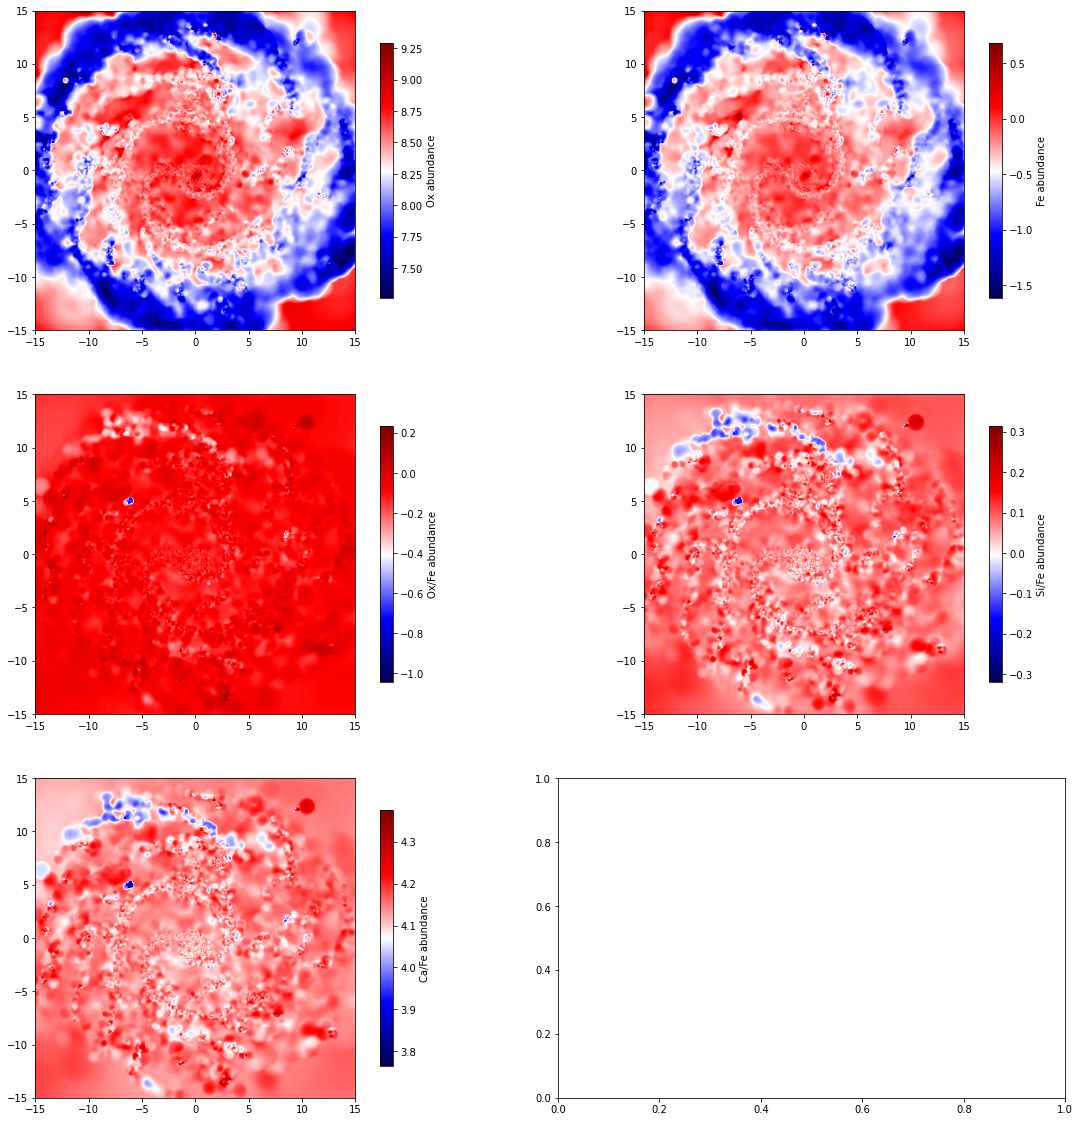

In [4]:
rango = [10, 40, 80, 150]
for i in rango:
    snap = data.snaps[i]

    ox_mass = snap.part[0]['ElementAbundance'][:,3]
    h_mass = snap.part[0]['ElementAbundance'][:,6]
    fe_mass = snap.part[0]['ElementAbundance'][:,4]
    si_mass = snap.part[0]['ElementAbundance'][:,5]
    ca_mass = snap.part[0]['ElementAbundance'][:,10]

    x,y,z = snap.centroid(snap.pos)
    extent = [-15,15,-15,15]

    ox_qv = snap.quickview(r='infinity', pos=snap.pos[0], mass=ox_mass, x=x,y=y,z=z, extent=extent, plot=False, 
                        logscale=False, nb=15)
    h_qv = snap.quickview(r='infinity', pos=snap.pos[0], mass=h_mass, x=x,y=y,z=z, extent=extent, plot=False, 
                        logscale=False, nb=15)
    fe_qv = snap.quickview(r='infinity', pos=snap.pos[0], mass=fe_mass, x=x,y=y,z=z, extent=extent, plot=False, 
                        logscale=False, nb=15)
    si_qv = snap.quickview(r='infinity', pos=snap.pos[0], mass=si_mass, x=x,y=y,z=z, extent=extent, plot=False, 
                        logscale=False, nb=15)
    ca_qv = snap.quickview(r='infinity', pos=snap.pos[0], mass=ca_mass, x=x,y=y,z=z, extent=extent, plot=False, 
                        logscale=False, nb=15)

    ox_img = ox_qv.get_image()
    h_img = h_qv.get_image()
    fe_img = fe_qv.get_image()
    si_img = si_qv.get_image()
    ca_img = ca_qv.get_image()

    ox_ab = 12 + np.log10(ox_img/16) - np.log10(h_img)
    fe_ab = 4.5 + np.log10(fe_img/55/h_img)
    ox_fe_ab = -1.37 + np.log10((ox_img/16)/(fe_img/56))
    si_fe_ab = -0.05 + np.log10((si_img/28)/(fe_img/56)) 
    ca_fe_ab = 5.3 + np.log10((ca_img/40)/(fe_img/56)) 

    #print(ox_ab)

    lista_ab = [ox_ab, fe_ab, ox_fe_ab, si_fe_ab, ca_fe_ab]
    labels = ['Ox abundance', 'Fe abundance', 'Ox/Fe abundance', 'Si/Fe abundance', 'Ca/Fe abundance']


    fig = plt.figure(figsize=(20,20))
    gs = gridspec.GridSpec(nrows=3, ncols=2)

    axs = []
    for i in range(3):
        for j in range(2):
            ax = fig.add_subplot(gs[i,j])
            axs.append(ax)


    for i in range(len(lista_ab)):
        vmin, vmax = snap.get_v(lista_ab[i], 1, 1)
        show = axs[i].imshow(lista_ab[i], extent=extent, cmap='seismic', vmin=vmin, vmax=vmax)
        cbar = fig.colorbar(show, shrink=0.8, ax=axs[i], spacing='proportional')
        cbar.set_label(f'{labels[i]}')
    plt.show()

# creating the age distribution video

· It is generated in the same way as for the age distribution step, but for all the snaps.

· the video is generated with data.show_img

/home/feliperojas/jupy/lib64/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/home/feliperojas/simulations/simulación 1 (iso-h2)/classes.py:373: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0 = plt.subplot(self.gs[0, 0])


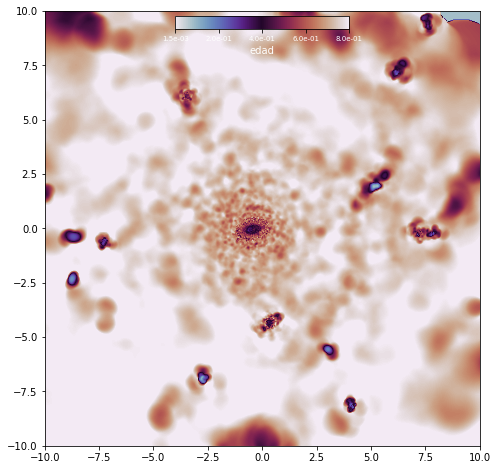

In [10]:
imagenes = []
extent = [-10, 10, -10, 10]
for i in range(len(data.snaps)):
    minimo = 10e10
    snap = data.snaps[i]
    x,y,z = snap.centroid(snap.pos)
    time = (snap.header['time'] - snap.part[4]['StellarFormationTime'])*(9.8e8)/(1e9)
    masa = snap.mass[4]
    age_qv = snap.quickview(pos= snap.pos[4],mass= time*masa[:,0], r='infinity', extent=extent,
                        plot=False, x=x, y=y, z=z, logscale=False) 
    density = snap.quickview(pos= snap.pos[4],mass= masa[:,0], r='infinity', extent=extent,
                        plot=False, x=x, y=y, z=z, logscale=False) 
    img = age_qv.get_image()
    mass = density.get_image()
    
    real_img = img/mass
    
    for i in real_img:
        for j in i:
            if j < minimo and not np.isnan(j) and j != -math.inf:
                minimo = j
    
    for i in range(len(real_img)):
        for j in range(len(real_img[i])):
            if np.isnan(real_img[i][j]) or real_img[i][j] == -math.inf:
                real_img[i][j] = minimo
                
    imagenes.append(real_img)
    #plt.imsave('imag/img_' + str('%03d.png'%i), img, dpi=200, cmap='bone')

    
    
vmin,vmax = data.vmean(imagenes, 50) 
data.init_img()
i=0
for img in imagenes:
    path = 'imag/img_' + str('%03d'%i)
    data.show_img(img=img, extent=extent, vmin=vmin, vmax=vmax, label='edad', save= True, path=path,
                  cmap=cmp.sunlight())
    i+=1
data.end_img()

In [13]:
path = 'imag/'
path2 = 'dist_edades'
data.save_gif(path, path2)

# creating the abundance distribution video

· the same is generated as for the abundance distribution but for all snap.

· nan and infinities are eliminated, thus leaving the data correctly.

· the video is generated with data.show_img

In [11]:
imagenes = []
for i in range(len(data.snaps)):
    minimo = 10
    snap = data.snaps[i]
    x,y,z = snap.centroid(snap.pos)
    extent = [-2,2,-2,2]
    pos = snap.pos[4]
    ox_mass = snap.part[4]['ElementAbundance'][:,3]
    h_mass = snap.part[4]['ElementAbundance'][:,6]
    
    ox_qv = snap.quickview(r='infinity', pos=pos, mass=ox_mass, x=x,y=y,z=z, extent=extent, plot=False, 
                        logscale=False, nb=15)
    h_qv = snap.quickview(r='infinity', pos=pos, mass=h_mass, x=x,y=y,z=z, extent=extent, plot=False, 
                          logscale=False, nb=15)
    
    ox_img = ox_qv.get_image()
    h_img = h_qv.get_image()
    ox_ab = 12 + np.log10(ox_img/16) - np.log10(h_img)
    
    for i in ox_ab:
        for j in i:
            if j < minimo and not np.isnan(j) and j != -math.inf:
                minimo = j
    
    for i in range(len(ox_ab)):
        for j in range(len(ox_ab[i])):
            if np.isnan(ox_ab[i][j]) or ox_ab[i][j] == -math.inf:
                ox_ab[i][j] = minimo

    
    
    #qv = snap.quickview(pos= snap.pos[4],mass= ox_ab, r='infinity', extent=[-18, 18, -18, 18],
                        #plot=False, x=x, y=y, z=z)
    #img = qv.get_image()
    imagenes.append(ox_ab)
    #plt.imsave('imag/img_' + str('%03d.png'%i), img, dpi=200, cmap='bone')


#print(collections.Counter(imagenes[3])[None])



/home/feliperojas/jupy/lib64/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/home/feliperojas/jupy/lib64/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in subtract


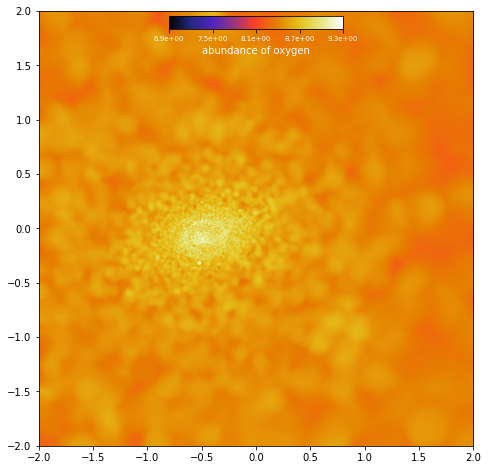

In [14]:
vmin,vmax = data.vmean(imagenes, 100)
data.init_img()
i=0
for img in imagenes:
    #vmin, vmax = snap.get_v(img, 1, 1)
    path = 'imag/img_' + str('%03d'%i)
    data.show_img(img=img, extent=extent, vmin=vmin, vmax=vmax*1.5, label='abundance of oxygen', save= True, path=path,
                  cmap='CMRmap')
    i+=1
data.end_img()

In [ ]:
path = 'imag/'
path2 = 'dist_ox_ab'
data.save_gif(path, path2)

In [3]:
imagenes = []
for i in range(len(data.snaps)):
    minimo = 10e10
    snap = data.snaps[i]
    x,y,z = snap.centroid(snap.pos)
    extent = [-10,10,-10,10]
    pos = snap.pos[0]
    ox_mass = snap.part[0]['ElementAbundance'][:,3]
    h_mass = snap.part[0]['ElementAbundance'][:,6]
    
    ox_qv = snap.quickview(r='infinity', pos=pos, mass=ox_mass, x=x,y=y,z=z, extent=extent, plot=False, 
                        logscale=False, nb=15)
    h_qv = snap.quickview(r='infinity', pos=pos, mass=h_mass, x=x,y=y,z=z, extent=extent, plot=False, 
                          logscale=False, nb=15)
    
    ox_img = ox_qv.get_image()
    h_img = h_qv.get_image()
    ox_ab = 12 + np.log10(ox_img/16) - np.log10(h_img)
    
    for i in ox_ab:
        for j in i:
            if j < minimo and not np.isnan(j) and j != -math.inf:
                minimo = j
    
    for i in range(len(ox_ab)):
        for j in range(len(ox_ab[i])):
            if np.isnan(ox_ab[i][j]) or ox_ab[i][j] == -math.inf:
                ox_ab[i][j] = minimo

    
    
    #qv = snap.quickview(pos= snap.pos[4],mass= ox_ab, r='infinity', extent=[-18, 18, -18, 18],
                        #plot=False, x=x, y=y, z=z)
    #img = qv.get_image()
    imagenes.append(ox_ab)
    #plt.imsave('imag/img_' + str('%03d.png'%i), img, dpi=200, cmap='bone')


#print(collections.Counter(imagenes[3])[None])




/home/feliperojas/jupy/lib64/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/home/feliperojas/jupy/lib64/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in subtract


/home/feliperojas/simulations/simulación 1 (iso-h2)/classes.py:373: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0 = plt.subplot(self.gs[0, 0])


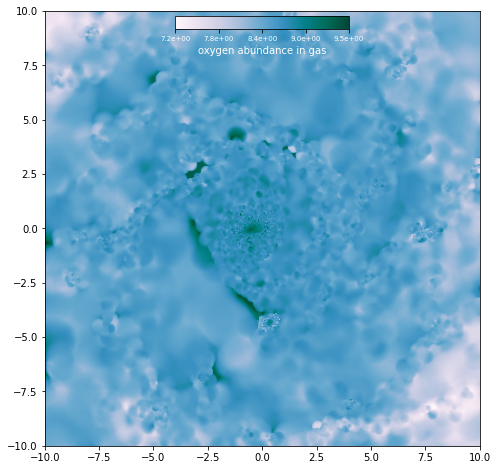

In [4]:
vmin,vmax = data.vmean(imagenes, 100)
data.init_img()
extent = [-10,10,-10,10]
i=0
for img in imagenes:
    path = 'imag/img_' + str('%03d'%i)
    data.show_img(img=img, extent=extent, vmin=vmin, vmax=vmax, label='oxygen abundance in gas', save= True, path=path,
                  cmap='PuBuGn')
    i+=1
data.end_img()

In [5]:
path = 'imag/'
path2 = 'dist_ox_ab_gas'
data.save_gif(path, path2)